# Curve fitting using real-value GA

## Generate data sample for a thrid-order polynomial

In [8]:
import numpy as np

def third_order_polynomial(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

# Define coefficients for the third-order polynomial
a, b, c, d = 2, -3, 4, 1

# Generate x values
x_values = np.linspace(0, 5, 5)

# Calculate y values using the third-order polynomial function
y_values = third_order_polynomial(x_values, a, b, c, d)

# Combine x and y values into an array of data samples
data_samples = np.column_stack((x_values, y_values))

print("Generated data samples from a third-order polynomial:\n", data_samples)


Generated data samples from a third-order polynomial:
 [[  0.        1.     ]
 [  1.25      5.21875]
 [  2.5      23.5    ]
 [  3.75     79.28125]
 [  5.      196.     ]]


### Curve fitting

In [9]:
import numpy as np
from pymoo.algorithms.soo.nonconvex.ga import GA
from pymoo.operators.crossover.pntx import PointCrossover
from pymoo.operators.mutation.pm import PolynomialMutation
from pymoo.operators.repair.rounding import RoundingRepair
from pymoo.operators.sampling.rnd import FloatRandomSampling
from pymoo.core.problem import Problem
from pymoo.optimize import minimize

### Input data

In [10]:
x=x_values
y=y_values

### Define the problem

In [11]:
class CurveFittingProblem(Problem):

    def __init__(self):
        super().__init__(n_var=4,
                         n_obj=1,
                         n_constr=0,
                         xl=-10.0,
                         xu=10.0, vtype=float)    

    def _evaluate(self, X, out, *args, **kwargs):
        Y = np.zeros((X.shape[0], 1))
        for i, coeffs in enumerate(X):
            y_pred = np.polyval(coeffs, x)
            mse = np.mean((y - y_pred)**2)
            Y[i] = mse
        out["F"] = Y

### Define and run the solver for the problem

In [12]:
problem = CurveFittingProblem()

algorithm = GA(
    pop_size=50,
    sampling=FloatRandomSampling(),
    crossover=PointCrossover(prob=0.8, n_points=2),
    mutation = PolynomialMutation(prob=0.3, repair=RoundingRepair()),
    eliminate_duplicates=True
)

res = minimize(problem, algorithm, ('n_gen', 100), seed=1, verbose=True)

n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       50 |  1.703105E+05 |  1.292856E+02
     2 |      100 |  2.103690E+04 |  1.292856E+02
     3 |      150 |  3.450996E+03 |  2.818018E+01
     4 |      200 |  9.394156E+02 |  1.260156E+01
     5 |      250 |  5.672089E+02 |  1.260156E+01
     6 |      300 |  4.464128E+02 |  1.260156E+01
     7 |      350 |  3.392862E+02 |  1.260156E+01
     8 |      400 |  2.589571E+02 |  1.260156E+01
     9 |      450 |  2.196908E+02 |  1.260156E+01
    10 |      500 |  1.517321E+02 |  1.260156E+01
    11 |      550 |  1.083781E+02 |  1.260156E+01
    12 |      600 |  9.043525E+01 |  1.260156E+01
    13 |      650 |  6.317252E+01 |  1.260156E+01
    14 |      700 |  5.207010E+01 |  1.260156E+01
    15 |      750 |  4.580119E+01 |  1.260156E+01
    16 |      800 |  4.128697E+01 |  1.260156E+01
    17 |      850 |  3.787242E+01 |  1.260156E+01
    18 |      900 |  3.659616E+01 |  1.260156E+01
    19 |      950 |  3.573302E+01 |  1.260156E+01


### Print the four coefficients

In [13]:
best_coeffs = res.X
print("Coefficients of the best-fit third-order polynomial:")
print("a =", best_coeffs[0])
print("b =", best_coeffs[1])
print("c =", best_coeffs[2])
print("d =", best_coeffs[3])

Coefficients of the best-fit third-order polynomial:
a = 2
b = -2
c = -1
d = 4


### Plot the original data and the obtained third-order polynomial

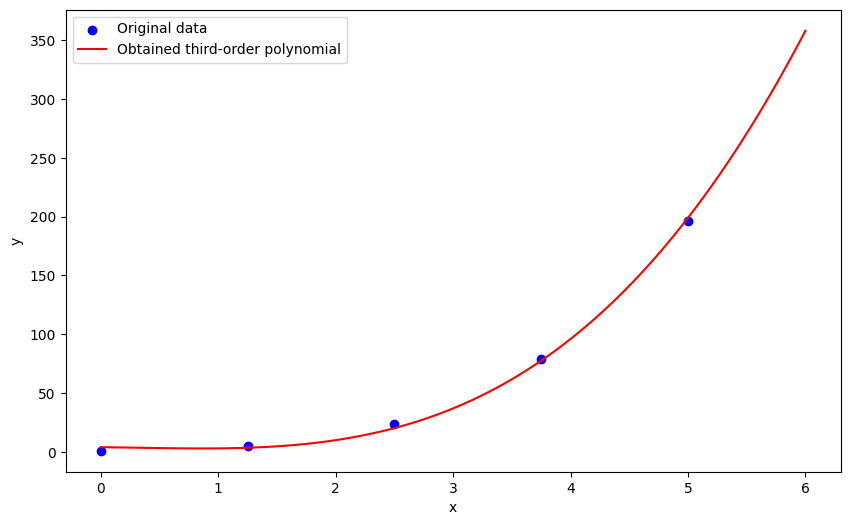

In [14]:
import matplotlib.pyplot as plt

# Plot the original data
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label="Original data", color="blue")

# Calculate the obtained third-order polynomial
x_plot = np.linspace(0, 6, 100)
y_plot = np.polyval(best_coeffs, x_plot)

# Plot the obtained third-order polynomial
plt.plot(x_plot, y_plot, label="Obtained third-order polynomial", color="red")

# Add labels and legend
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

# Show the plot
plt.show()
# plt.savefig('CH08_F01_CurveFitting.png', format='png', dpi=300)